# Maximum Likelihood Estimation
## Problem:
    Write a short Python (or Matlab, Julia etc.) script that 
    (1) generates some data y as the output of a parametric function of x (e.g. a polynomial), 
    (2) adds noise to it and plots y vs. x, then 
    (3) solves the inverse problem of identifying the parameters of the underlying function from data, using maximum likelihood estimation, and plots the fitted curve on the same plot as the data. 

In [20]:
using  Distributions, Optim, Plots, StatsFuns

In [21]:
nvar,n = 2,100;

In [22]:
X = rand(Normal(0,1), n, nvar-1);

In [23]:
A = 0.5; # Noise Amplitude

In [24]:
β = [0,7,1]; # Polynomial coeffs.

In [25]:
function gen(n,nvar,A,β,X)
    ϵ = randn(n) * A
    y = (X * β[1] .+ X.^2 * β[2] .+ X.^3 * β[3]) .+ ϵ
    return y
end

gen (generic function with 1 method)

In [26]:
y = gen(n,nvar,A,β,X);

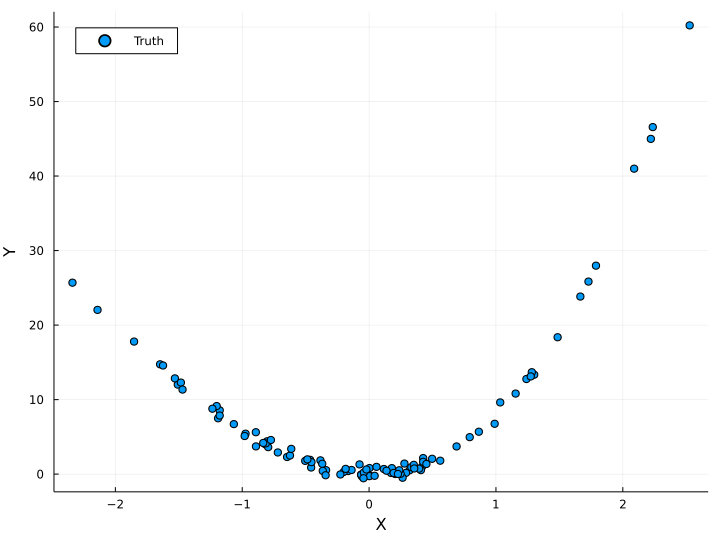

In [27]:
scatter(X, y, ylabel = "Y", xlabel = "X", label="Truth", legend=:topleft, size=(720,540))

In [28]:
function log_lkhd(X, y, n, β, A) 
    ŷ = gen(n,nvar,A,β,X)
    ll = sum(-logpdf.(Normal(0.1,1),y-ŷ))/n
    return ll
end

log_lkhd (generic function with 1 method)

In [29]:
log_lkhd(X, y, size(y,1),β,A) # Test log likelihood

1.158081362034104

In [30]:
f(X,y,n,A) = β -> log_lkhd(X, y, n, β, A) #closure for optimise call

f (generic function with 1 method)

In [31]:
ν = f(X,y,n,A) #wrapper

#3 (generic function with 1 method)

In [32]:
ν([0.2,0.2,0.1]) #Test ν

73.74373353757701

In [33]:
res = optimize(ν, [0.,0.,0.], LBFGS(), autodiff=:forward)

 * Status: success (objective increased between iterations)

 * Candidate solution
    Final objective value:     1.133390e+00

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = 9.56e-03 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.44e-03 ≰ 0.0e+00
    |g(x)|                 = 1.78e-01 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    3
    f(x) calls:    56
    ∇f(x) calls:   56


In [34]:
β̂ = Optim.minimizer(res)

3-element Vector{Float64}:
 -0.20889033677801083
  6.982781768967852
  1.085667087704798

In [35]:
β-β̂

3-element Vector{Float64}:
  0.20889033677801083
  0.017218231032147813
 -0.08566708770479803

In [36]:
ŷ = gen(n,nvar,0.,β̂,X);

In [37]:
ψ = sortslices([X[:] ŷ[:]], dims=1);

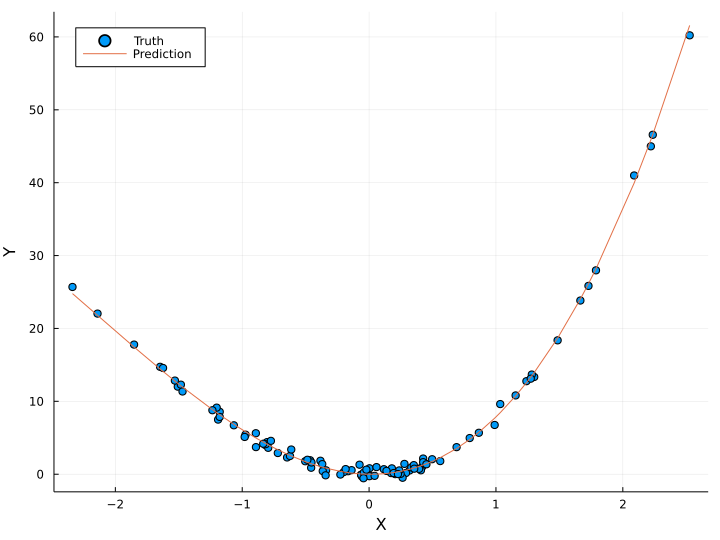

In [38]:
plot!(ψ[:,1], ψ[:,2], ylabel = "Y", xlabel = "X", label="Prediction", legend=:topleft, size=(720,540))